In [23]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta=0.01,n_iter=50,random_state=1):
        self.eta = eta
        self.n_iter=n_iter
        self.random_state=random_state
    
    def fit(self, X, y):
        rgen = np.random.RandomState(42)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.errors_=[]
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)

<function matplotlib.pyplot.show>

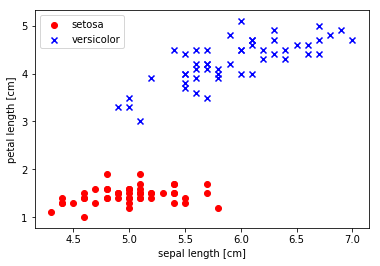

In [13]:

import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv('/Users/mac/Documents/MScAI/python_ml/exercises/ex2/iris.data', header=None)

y=df.iloc[0:100, 4].values
y=np.where(y=='Iris-setosa', -1, -1)

X = df.iloc[0:100, [0, 2]].values
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show

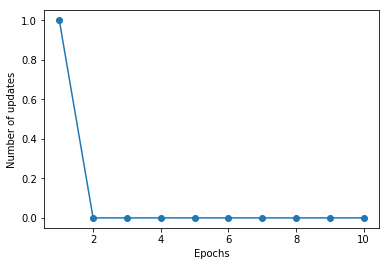

In [24]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X,y)
plt.plot(range(1, len(ppn.errors_) +1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

[[5.3  5.32 5.34 ... 7.94 7.96 7.98]
 [5.3  5.32 5.34 ... 7.94 7.96 7.98]
 [5.3  5.32 5.34 ... 7.94 7.96 7.98]
 ...
 [5.3  5.32 5.34 ... 7.94 7.96 7.98]
 [5.3  5.32 5.34 ... 7.94 7.96 7.98]
 [5.3  5.32 5.34 ... 7.94 7.96 7.98]]
[[2.   2.   2.   ... 2.   2.   2.  ]
 [2.02 2.02 2.02 ... 2.02 2.02 2.02]
 [2.04 2.04 2.04 ... 2.04 2.04 2.04]
 ...
 [6.04 6.04 6.04 ... 6.04 6.04 6.04]
 [6.06 6.06 6.06 ... 6.06 6.06 6.06]
 [6.08 6.08 6.08 ... 6.08 6.08 6.08]]


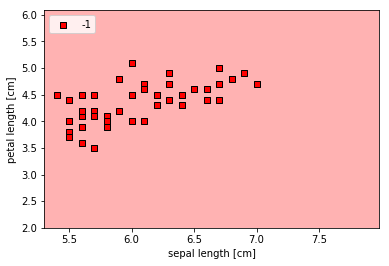

In [29]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min()+1, X[:, 0].max()+1
    x2_min, x2_max = X[:, 1].min()+1, X[:, 1].max()+1
    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    
    print(xx1)
    print(xx2)
    
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=1.0, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')
        
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')


# plt.savefig('images/02_08.png', dpi=300)
plt.show()
    

In [ ]:

class AdalineGD(object):
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self,X,y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            net_input = self.net_input(X)
            # Please note that the "activation" method has no effect
            # in the code since it is simply an identity function. We
            # could write `output = self.net_input(X)` directly instead.
            # The purpose of the activation is more conceptual, i.e.,  
            # in the case of logistic regression (as we will see later), 
            # we could change it to
            # a sigmoid function to implement a logistic regression classifier.
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
        """Compute linear activation"""
        return X

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0, 1, -1)
